In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import ticker
import slopestabilitytools.set_labels
# import slopestabilitytools.datamanagement.read_to_pandas

In [2]:
test_result = pd.read_csv('../results/results/hor_11.csv')

In [3]:
x = test_result['X']
y = test_result['Y']
classes = test_result['CLASS']
classesn = test_result['CLASSN']
res = test_result['RES']
resn = test_result['RESN']

x_min = np.min(x)
x_max = np.max(x)
x_n = len(x)

y_min = np.min(y)
y_max = np.max(y)
y_start = y_max
y_end = y_min
y_n = len(y)

xi = np.linspace(x_min, x_max, x_n)
yi = np.linspace(y_start, y_end, y_n)
xx, yy = np.meshgrid(xi, yi)
classes_i = interpolate.griddata((x, y), classes, (xx, yy), method='nearest')
classesn_i = interpolate.griddata((x, y), classesn, (xx, yy), method='nearest')
res_i = interpolate.griddata((x, y), res, (xx, yy), method='nearest')
resn_i = interpolate.griddata((x, y), resn, (xx, yy), method='nearest')

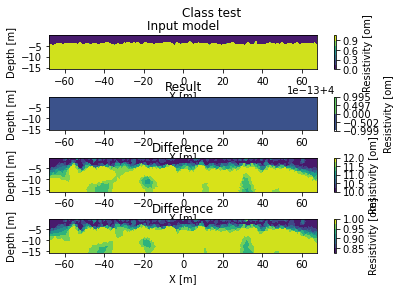

In [4]:
cb = []

fig, _ax = plt.subplots(nrows=4, ncols=1)
ax = _ax.flatten()

fig.suptitle('Class test')
fig.subplots_adjust(hspace=0.8)

im0 = ax[0].contourf(xi, yi, classes_i)
ax[0].set_title('Input model')
ax[0] = slopestabilitytools.set_labels(ax[0])
cb.append(plt.colorbar(im0, ax=ax[0], label='Resistivity [om]'))#, shrink=0.9)
tick_locator = ticker.MaxNLocator(nbins=4)
cb[0].locator = tick_locator
cb[0].update_ticks()

im1 = ax[1].contourf(xi, yi, classesn_i)
ax[1].set_title('Result')
ax[1] = slopestabilitytools.set_labels(ax[1])
cb.append(plt.colorbar(im1, ax=ax[1], label='Resistivity [om]'))#, shrink=0.9)
tick_locator = ticker.MaxNLocator(nbins=4)
cb[1].locator = tick_locator
cb[1].update_ticks()

im2 = ax[2].contourf(xi, yi, res_i)
ax[2].set_title('Difference')
ax[2] = slopestabilitytools.set_labels(ax[2])
cb.append(plt.colorbar(im2, ax=ax[2], label='Resistivity [om]'))#, shrink=0.9)
tick_locator = ticker.MaxNLocator(nbins=4)
cb[2].locator = tick_locator
cb[2].update_ticks()

im2 = ax[3].contourf(xi, yi, resn_i)
ax[3].set_title('Difference')
ax[3] = slopestabilitytools.set_labels(ax[3])
cb.append(plt.colorbar(im2, ax=ax[3], label='Resistivity [om]'))#, shrink=0.9)
tick_locator = ticker.MaxNLocator(nbins=4)
cb[3].locator = tick_locator
cb[3].update_ticks()